In [39]:
import os
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

def load_predictions(prediction_dir):
    predictions = {}
    for file_name in os.listdir(prediction_dir):
        if file_name.endswith('.csv'):
            # model_name = os.path.splitext(file_name)[0]
            model_name = file_name
            if model_name.startswith('allenai_scibert_scivocab_uncased'):
                model_name = 'scibert'
            elif model_name.startswith('bert-base-uncased'):
                model_name = 'bert-base'
            elif model_name.startswith('dmis-lab_biobert'):
                model_name = 'biobert'
            elif model_name.startswith('microsoft_BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext'):
                model_name = 'PubMedBERT-fulltext'
            elif model_name.startswith('microsoft_BiomedNLP-BiomedBERT-base-uncased-abstract'):
                model_name = 'BiomedBERT'
            else:
                raise ValueError("Invalid model name.")
            file_path = os.path.join(prediction_dir, file_name)
            df = pd.read_csv(file_path)
            predictions[model_name] = df
    return predictions


def calculate_metrics(predictions):
    metrics = {}
    for model_name, df in predictions.items():
        true_labels = df['true_label']
        predicted_labels = df['prediction']
        
        f1_micro = f1_score(true_labels, predicted_labels, average='micro')
        f1_macro = f1_score(true_labels, predicted_labels, average='macro')
        f1_weighted = f1_score(true_labels, predicted_labels, average='weighted')
        accuracy = accuracy_score(true_labels, predicted_labels)        
        metrics[model_name] = {'f1_micro': f1_micro, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted,'accuracy': accuracy}

    return metrics


def plot_metrics(metrics, classification_type):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 9))
    va_position = 'top'

    # Plot F1 micro
    f1_micro_bars = axes[0, 0].bar(metrics.keys(), [metric['f1_micro'] for metric in metrics.values()], color='skyblue')
    axes[0, 0].set_xlabel('Model')
    axes[0, 0].set_ylabel('F1 Micro')
    axes[0, 0].set_title(f'F1 Micro: {classification_type}')
    axes[0, 0].tick_params(axis='x', rotation=90)
    axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
    for bar in f1_micro_bars:
        yval = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    # Plot F1 macro
    f1_macro_bars = axes[0, 1].bar(metrics.keys(), [metric['f1_macro'] for metric in metrics.values()], color='indianred')
    axes[0, 1].set_xlabel('Model')
    axes[0, 1].set_ylabel('F1 Macro')
    axes[0, 1].set_title(f'F1 Macro: {classification_type}')
    axes[0, 1].tick_params(axis='x', rotation=90)
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
    for bar in f1_macro_bars:
        yval = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    # Plot F1 weighted
    f1_weighted_bars = axes[1, 0].bar(metrics.keys(), [metric['f1_weighted'] for metric in metrics.values()], color='plum')
    axes[1, 0].set_xlabel('Model')
    axes[1, 0].set_ylabel('F1 Weighted')
    axes[1, 0].set_title(f'F1 Weighted: {classification_type}')
    axes[1, 0].tick_params(axis='x', rotation=90)
    axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
    for bar in f1_weighted_bars:
        yval = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    # Plot accuracy
    accuracy_bars = axes[1, 1].bar(metrics.keys(), [metric['accuracy'] for metric in metrics.values()], color='darkseagreen')
    axes[1, 1].set_xlabel('Model')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_title(f'Accuracy: {classification_type}')
    axes[1, 1].tick_params(axis='x', rotation=90)
    axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
    for bar in accuracy_bars:
        yval = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    plt.tight_layout()
    plt.show()



def main(classification_type):

    if classification_type == 'binary':
        prediction_dir = '../../models/transformers/evaluations/binary/predictions'
    elif classification_type=='multi':
        prediction_dir = '../../models/transformers/evaluations/multi/predictions'

    predictions = load_predictions(prediction_dir)
    metrics = calculate_metrics(predictions)
    plot_metrics(metrics, classification_type)

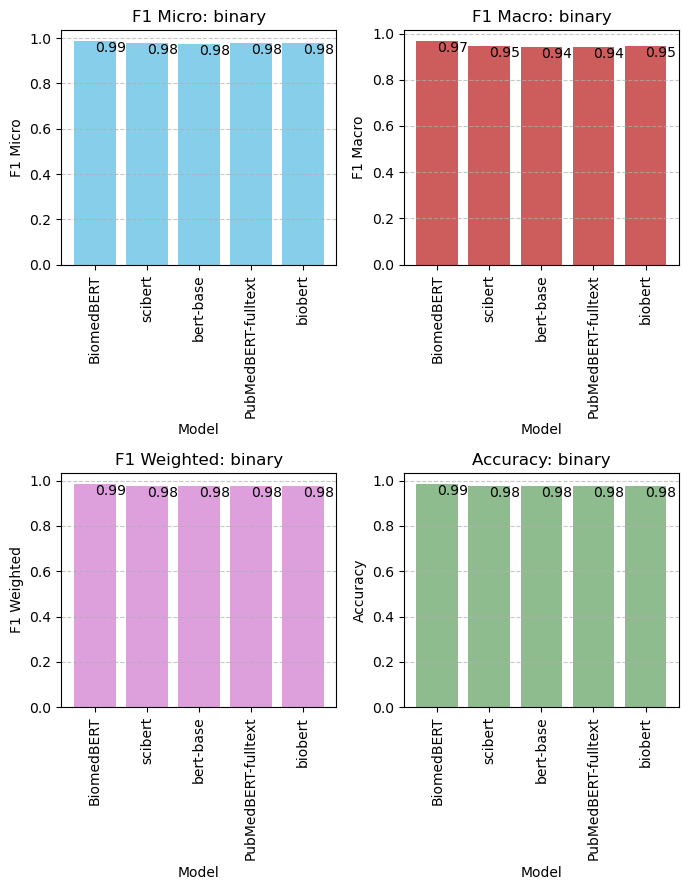

In [40]:
if __name__ == "__main__":
    # TODO select classification type (binary, multi)
    main(classification_type='binary')

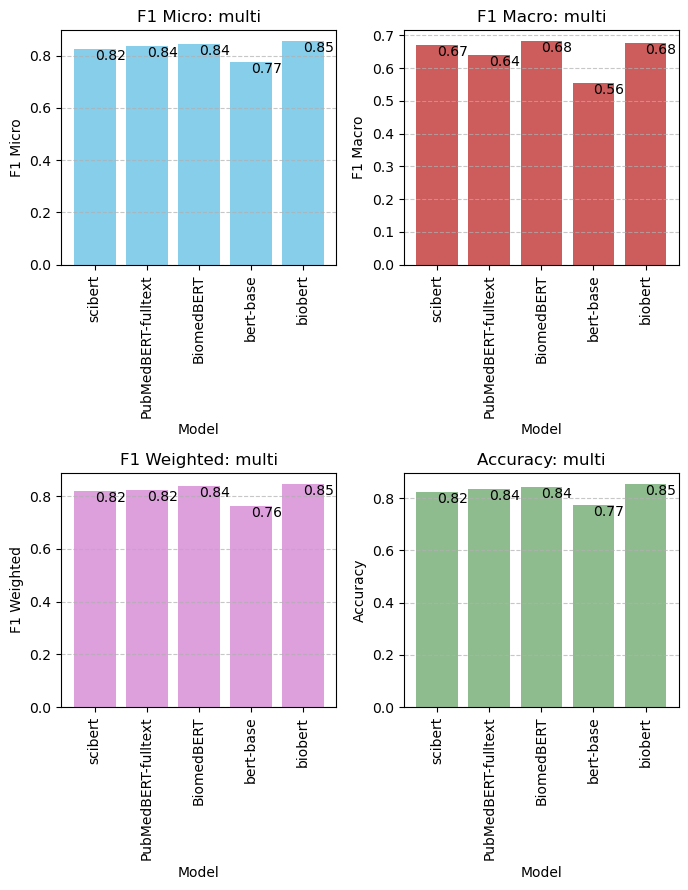

In [41]:
if __name__ == "__main__":
    # TODO select classification type (binary, multi)
    main(classification_type='multi')